In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.figure_factory as ff

In [306]:
df = pd.read_csv('mobile phone price prediction.csv')
df.head(5)

,Unnamed: 0,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
0,0,Samsung Galaxy F14 5G,4.65,68,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",13,"9,999",Samsung,128 GB inbuilt,25W Fast Charging,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330
1,1,Samsung Galaxy A11,4.20,63,"Dual Sim, 3G, 4G, VoLTE,",2 GB RAM,4000 mAh Battery,6.4 inches,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"Memory Card Supported, upto 512 GB",10,"9,990",Samsung,32 GB inbuilt,15W Fast Charging,720 x 1560 px Display with Punch Hole,1.8 GHz Processor,Octa Core
2,2,Samsung Galaxy A13,4.30,75,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.6 inches,50 MP Quad Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,25W Fast Charging,1080 x 2408 px Display with Water Drop Notch,2 GHz Processor,Octa Core
3,3,Samsung Galaxy F23,4.10,73,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,6000 mAh Battery,6.4 inches,48 MP Quad Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,NaN,720 x 1600 px,Octa Core,Helio G88
4,4,Samsung Galaxy A03s (4GB RAM + 64GB),4.10,69,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.5 inches,13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Fro...,"Memory Card Supported, upto 1 TB",11,"11,999",Samsung,64 GB inbuilt,15W Fast Charging,720 x 1600 px Display with Water Drop Notch,Octa Core,Helio P35


# Data Cleaning
### -Removing Unwanted Columns
### -Filling Null and Nan Values

In [307]:
##Shows the shape of dataset Row, column
df.shape

(1370, 18)

In [308]:
#print all column names in dataset
df.columns

Index(['Unnamed: 0', 'Name', 'Rating', 'Spec_score', 'No_of_sim', 'Ram',
       'Battery', 'Display', 'Camera', 'External_Memory', 'Android_version',
       'Price', 'company', 'Inbuilt_memory', 'fast_charging',
       'Screen_resolution', 'Processor', 'Processor_name'],
      dtype='object')

In [309]:
#Shows More Information About Colunms (Column Name, Data Type, Non-Null Count Values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1370 non-null   int64  
 1   Name               1370 non-null   object 
 2   Rating             1370 non-null   float64
 3   Spec_score         1370 non-null   int64  
 4   No_of_sim          1370 non-null   object 
 5   Ram                1370 non-null   object 
 6   Battery            1370 non-null   object 
 7   Display            1370 non-null   object 
 8   Camera             1370 non-null   object 
 9   External_Memory    1370 non-null   object 
 10  Android_version    927 non-null    object 
 11  Price              1370 non-null   object 
 12  company            1370 non-null   object 
 13  Inbuilt_memory     1351 non-null   object 
 14  fast_charging      1281 non-null   object 
 15  Screen_resolution  1368 non-null   object 
 16  Processor          1342 

In [310]:
#Print Sum of Null Values
df.isnull().sum()

Unnamed: 0             0
Name                   0
Rating                 0
Spec_score             0
No_of_sim              0
Ram                    0
Battery                0
Display                0
Camera                 0
External_Memory        0
Android_version      443
Price                  0
company                0
Inbuilt_memory        19
fast_charging         89
Screen_resolution      2
Processor             28
Processor_name         0
dtype: int64

In [311]:
#Fill allthe null values using mean or mode

In [312]:
#Filling null values in Android_version colunm using Mode 
A_V_Mode = df['Android_version'].mode()[0]
A_V_Mode

'13'

In [313]:
df['Android_version'] = df['Android_version'].fillna(A_V_Mode)
df['Android_version'].isnull().sum()

0

In [314]:
#Filling null values in Inbuilt_memory colunm using Mode 
I_M_Mode = df['Inbuilt_memory'].mode()[0]
I_M_Mode

' 128 GB inbuilt'

In [315]:
df['Inbuilt_memory'] = df['Inbuilt_memory'].fillna(I_M_Mode)
df['Inbuilt_memory'].isnull().sum()

0

In [316]:
#Filling null values in fast_charging colunm using Mode 
F_C_Mode = df['fast_charging'].mode()[0]
F_C_Mode

' 18W Fast Charging'

In [317]:
df['fast_charging'] = df['fast_charging'].fillna(F_C_Mode)
df['fast_charging'].isnull().sum()

0

In [318]:
#Filling null values in Screen_resolution colunm using Mode 
S_R_Mode = df['Screen_resolution'].mode()[0]
S_R_Mode

' 1080 x 2400 px'

In [319]:
df['Screen_resolution'] = df['Screen_resolution'].fillna(S_R_Mode)
df['Screen_resolution'].isnull().sum()

0

In [320]:
#Filling null values in Processor colunm using Mode 
P_Mode = df['Processor'].mode()[0]
P_Mode

' Octa Core'

In [321]:
df['Processor'] = df['Processor'].fillna(P_Mode)
df['Processor'].isnull().sum()

0

In [322]:
df.isnull().sum()

Unnamed: 0           0
Name                 0
Rating               0
Spec_score           0
No_of_sim            0
Ram                  0
Battery              0
Display              0
Camera               0
External_Memory      0
Android_version      0
Price                0
company              0
Inbuilt_memory       0
fast_charging        0
Screen_resolution    0
Processor            0
Processor_name       0
dtype: int64

In [323]:
has_nan = df.isna().sum()  
print(has_nan)

Unnamed: 0           0
Name                 0
Rating               0
Spec_score           0
No_of_sim            0
Ram                  0
Battery              0
Display              0
Camera               0
External_Memory      0
Android_version      0
Price                0
company              0
Inbuilt_memory       0
fast_charging        0
Screen_resolution    0
Processor            0
Processor_name       0
dtype: int64


In [324]:
#Removing unwanted parts from the datasets
df['Ram']=pd.to_numeric(df['Ram'].replace({'GB':'','RAM':'',',':''},regex=True),errors='coerce') 
df['Battery']=pd.to_numeric(df['Battery'].replace({'mAh':'','Battery':'',',':''},regex=True),errors='coerce') 
df['Display']=pd.to_numeric(df['Display'].replace({'inches':'',',':''},regex=True),errors='coerce') 
df['Inbuilt_memory']=pd.to_numeric(df['Inbuilt_memory'].replace({'GB':'',',':'','inbuilt':''},regex=True),errors='coerce')
df['fast_charging']=pd.to_numeric(df['fast_charging'].replace({'W':'','Charging':'','Fast':''},regex=True),errors='coerce')
df['Price']=pd.to_numeric(df['Price'].replace({',':''},regex=True),errors='coerce')

In [325]:
df['External_Memory']

0                        Memory Card Supported, upto 1 TB
1                      Memory Card Supported, upto 512 GB
2                        Memory Card Supported, upto 1 TB
3                        Memory Card Supported, upto 1 TB
4                        Memory Card Supported, upto 1 TB
                              ...                        
1365                                 Memory Card (Hybrid)
1366                                 Memory Card (Hybrid)
1367                     Memory Card Supported, upto 1 TB
1368                     Memory Card Supported, upto 1 TB
1369    50 MP + 48 MP + 8 MP Triple Rear &amp; 32 MP F...
Name: External_Memory, Length: 1370, dtype: object

In [326]:
#Remove External_Memory Column (That contaion fake values)
column_to_remove = ['External_Memory']
df.drop(labels=column_to_remove, axis=1, inplace=True)

In [327]:
#Converting pricr column Indian Currency to SriLankan currency
df['Price'] = df['Price'] * 3.5

In [328]:
#Identify Duplicate Unique Values in Company column
df['company'].unique()

array(['Samsung', 'Vivo', 'Realme', 'OPPO', 'Oppo', 'iQOO', 'IQOO',
       'Poco', 'POCO', 'Honor', 'Nothing', 'Google', 'itel', 'Itel',
       'Asus', 'LG', 'Lenovo', 'Gionee', 'Motorola', 'OnePlus', 'Xiaomi',
       'Tecno', 'Huawei', 'Lava', 'Coolpad', 'TCL'], dtype=object)

In [329]:
#make datas to uppercase to remove duplicate unique value in Company column
df['company'] = df['company'].str.upper()
df['company'].unique()

array(['SAMSUNG', 'VIVO', 'REALME', 'OPPO', 'IQOO', 'POCO', 'HONOR',
       'NOTHING', 'GOOGLE', 'ITEL', 'ASUS', 'LG', 'LENOVO', 'GIONEE',
       'MOTOROLA', 'ONEPLUS', 'XIAOMI', 'TECNO', 'HUAWEI', 'LAVA',
       'COOLPAD', 'TCL'], dtype=object)

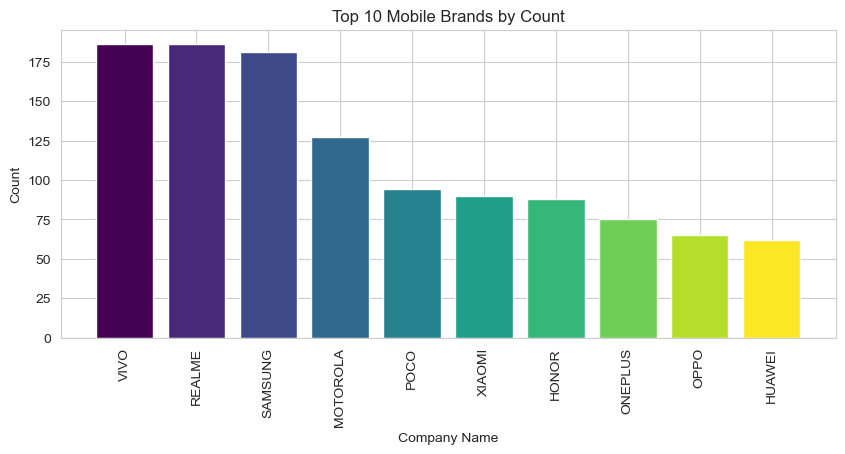

In [330]:
# Get top 10 companies
top_10_companies = df['company'].value_counts().head(10)
x = top_10_companies.index
y = top_10_companies.values

# Generate a gradient color map
colors = plt.cm.viridis(np.linspace(0, 1, len(x)))

# Plotting
plt.figure(figsize=(10, 4))
plt.xlabel('Company Name')
plt.ylabel('Count')
plt.title('Top 10 Mobile Brands by Count')
plt.bar(x, y, color=colors)
plt.xticks(rotation=90)
plt.show()

In [331]:
df.head()

,Unnamed: 0,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
0,0,Samsung Galaxy F14 5G,4.65,68,"Dual Sim, 3G, 4G, 5G, VoLTE,",4.0,6000.0,6.6,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,13,34996.5,SAMSUNG,128.0,25.0,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330
1,1,Samsung Galaxy A11,4.20,63,"Dual Sim, 3G, 4G, VoLTE,",2.0,4000.0,6.4,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...,10,34965.0,SAMSUNG,32.0,15.0,720 x 1560 px Display with Punch Hole,1.8 GHz Processor,Octa Core
2,2,Samsung Galaxy A13,4.30,75,"Dual Sim, 3G, 4G, VoLTE,",4.0,5000.0,6.6,50 MP Quad Rear &amp; 8 MP Front Camera,12,41996.5,SAMSUNG,64.0,25.0,1080 x 2408 px Display with Water Drop Notch,2 GHz Processor,Octa Core
3,3,Samsung Galaxy F23,4.10,73,"Dual Sim, 3G, 4G, VoLTE,",4.0,6000.0,6.4,48 MP Quad Rear &amp; 13 MP Front Camera,12,41996.5,SAMSUNG,64.0,18.0,720 x 1600 px,Octa Core,Helio G88
4,4,Samsung Galaxy A03s (4GB RAM + 64GB),4.10,69,"Dual Sim, 3G, 4G, VoLTE,",4.0,5000.0,6.5,13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Fro...,11,41996.5,SAMSUNG,64.0,15.0,720 x 1600 px Display with Water Drop Notch,Octa Core,Helio P35


In [332]:
unique_value_counts = df['Processor_name'].value_counts().head(10)
unique_value_counts

Processor_name
Snapdragon 8+ Gen1     58
Snapdragon 8 Gen2      55
Snapdragon 8 Gen3      44
Snapdragon 695         36
Snapdragon 680         34
Dimensity 6100 Plus    33
Dimensity 700 5G       31
Dimensity 6020         29
Octa Core Processor    26
Dimensity 7050         25
Name: count, dtype: int64

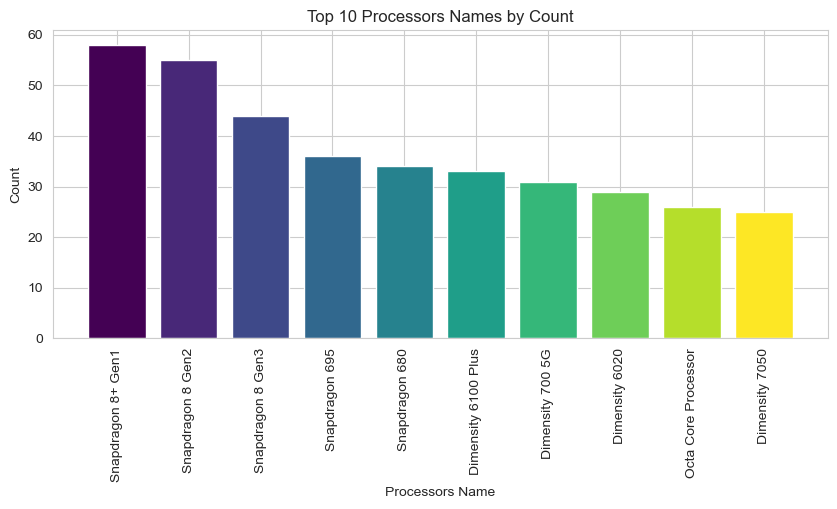

In [333]:
top_10_Processors = df['Processor_name'].value_counts().head(10)
x = top_10_Processors.index
y = top_10_Processors.values

# Generate a gradient color map
colors = plt.cm.viridis(np.linspace(0, 1, len(x)))

# Plotting
plt.figure(figsize=(10, 4))
plt.xlabel('Processors Name')
plt.ylabel('Count')
plt.title('Top 10 Processors Names by Count')
plt.bar(x, y, color=colors)
plt.xticks(rotation=90)
plt.show()

In [334]:
df['Android_version'].unique()

array(['13', '10', '12', '11', '15', '10.0', '9.0 (Pie)', '14',
       '7.1.1 (Nougat)', '8.0 (Oreo)', '8.1 (Oreo)', '5.1 (Lollipop)',
       '6.0 (Marshmallow)', '9 (Pie)', '3', '2', '4.0', '3.0 (Honeycomb)',
       '2.0', '3.0', '3.1', '5.0', '4.1'], dtype=object)

In [335]:
# Function to remove the string part and keep only the numeric version
def remove_string_part(version):
    if pd.isnull(version):
        return version  # Keep NaN values as they are
    # Extract the first numeric part only, including decimal
    match = re.match(r'^\d+(\.\d+)?', version)
    if match:
        return float(match.group(0))  # Return the numeric part as a float
    return version

# Apply the function to clean the Android_version column
df['Android_version_clean'] = df['Android_version'].apply(remove_string_part)

df['Android_version_clean'].unique()

array([13. , 10. , 12. , 11. , 15. ,  9. , 14. ,  7.1,  8. ,  8.1,  5.1,
        6. ,  3. ,  2. ,  4. ,  3.1,  5. ,  4.1])

# Feature Engineering
### Creating New Features in Existing Data

In [336]:
def extract_camera_megapixels(camera_info):
    # Extracting rear camera megapixels
    rear_camera_matches = re.findall(r'(\d+) MP', camera_info.split('&')[0])
    rear_camera_megapixels = [int(mp) for mp in rear_camera_matches]
    
    # Summing up the rear camera megapixels
    total_rear_camera_mp = sum(rear_camera_megapixels)
    
    # Extracting front camera megapixels
    front_camera_match = re.search(r'(\d+) MP Front', camera_info)
    front_camera_mp = int(front_camera_match.group(1)) if front_camera_match else None
    
    return total_rear_camera_mp, front_camera_mp

# Apply the function to the 'Camera' column
df['Total_Rear_Camera_MP'], df['Front_Camera_MP'] = zip(*df['Camera'].apply(extract_camera_megapixels))

# Display the DataFrame
df.head()

,Unnamed: 0,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name,Android_version_clean,Total_Rear_Camera_MP,Front_Camera_MP
0,0,Samsung Galaxy F14 5G,4.65,68,"Dual Sim, 3G, 4G, 5G, VoLTE,",4.0,6000.0,6.6,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,13,34996.5,SAMSUNG,128.0,25.0,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330,13.0,52,13.0
1,1,Samsung Galaxy A11,4.20,63,"Dual Sim, 3G, 4G, VoLTE,",2.0,4000.0,6.4,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...,10,34965.0,SAMSUNG,32.0,15.0,720 x 1560 px Display with Punch Hole,1.8 GHz Processor,Octa Core,10.0,20,8.0
2,2,Samsung Galaxy A13,4.30,75,"Dual Sim, 3G, 4G, VoLTE,",4.0,5000.0,6.6,50 MP Quad Rear &amp; 8 MP Front Camera,12,41996.5,SAMSUNG,64.0,25.0,1080 x 2408 px Display with Water Drop Notch,2 GHz Processor,Octa Core,12.0,50,8.0
3,3,Samsung Galaxy F23,4.10,73,"Dual Sim, 3G, 4G, VoLTE,",4.0,6000.0,6.4,48 MP Quad Rear &amp; 13 MP Front Camera,12,41996.5,SAMSUNG,64.0,18.0,720 x 1600 px,Octa Core,Helio G88,12.0,48,13.0
4,4,Samsung Galaxy A03s (4GB RAM + 64GB),4.10,69,"Dual Sim, 3G, 4G, VoLTE,",4.0,5000.0,6.5,13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Fro...,11,41996.5,SAMSUNG,64.0,15.0,720 x 1600 px Display with Water Drop Notch,Octa Core,Helio P35,11.0,17,5.0


In [337]:
# Define price ranges
def price_category(price):
    if price < 25000:
        return 'Budget'
    elif 25000 <= price < 75000:
        return 'Mid-range'
    else:
        return 'Premium'

# Apply the function to create a new column
df['Price Range'] = df['Price'].apply(price_category)

df[['Name', 'Price', 'Price Range']]

,Name,Price,Price Range
0,Samsung Galaxy F14 5G,34996.5,Mid-range
1,Samsung Galaxy A11,34965.0,Mid-range
2,Samsung Galaxy A13,41996.5,Mid-range
3,Samsung Galaxy F23,41996.5,Mid-range
4,Samsung Galaxy A03s (4GB RAM + 64GB),41996.5,Mid-range
...,...,...,...
1365,TCL 40R,66496.5,Mid-range
1366,TCL 50 XL NxtPaper 5G,87465.0,Premium
1367,TCL 50 XE NxtPaper 5G,83965.0,Premium
1368,TCL 40 NxtPaper 5G,78746.5,Premium


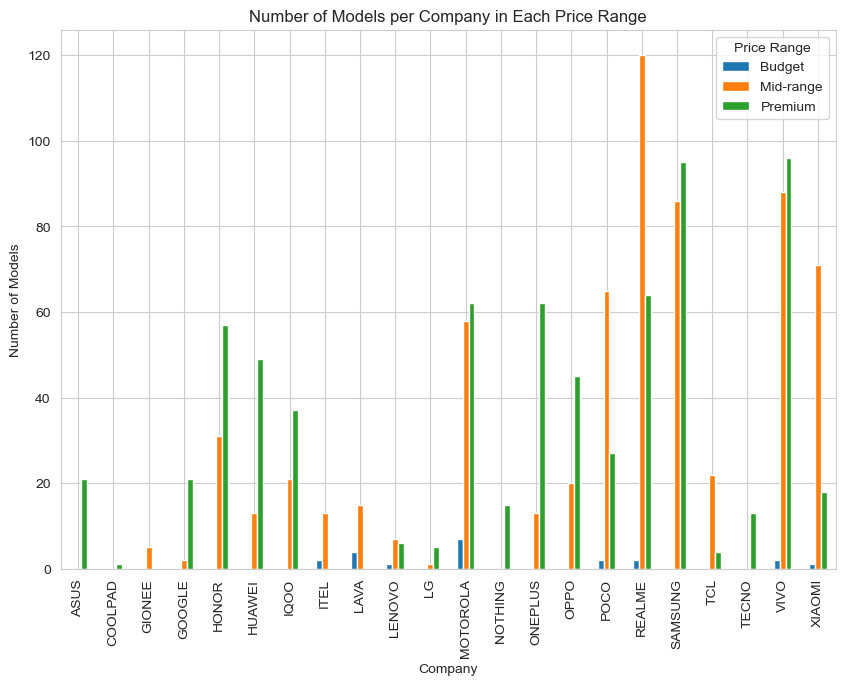

In [338]:
# Create a crosstab of company vs price range
price_company_distribution = pd.crosstab(df['company'], df['Price Range'])

# Plotting
price_company_distribution.plot(kind='bar', stacked=False, figsize=(10, 7))
plt.title('Number of Models per Company in Each Price Range')
plt.xlabel('Company')
plt.ylabel('Number of Models')
plt.xticks(rotation=90)  
plt.legend(title='Price Range')
plt.show()

In [339]:
# Define the rating categories
def rating_category(rating):
    if rating < 2:
        return 'Low'
    elif 2 <= rating < 4.5:
        return 'Medium'
    else:
        return 'High'

# Apply the function to create a new column
df['Rating Category'] = df['Rating'].apply(rating_category)
df[['Name', 'Rating', 'Rating Category']]

,Name,Rating,Rating Category
0,Samsung Galaxy F14 5G,4.65,High
1,Samsung Galaxy A11,4.20,Medium
2,Samsung Galaxy A13,4.30,Medium
3,Samsung Galaxy F23,4.10,Medium
4,Samsung Galaxy A03s (4GB RAM + 64GB),4.10,Medium
...,...,...,...
1365,TCL 40R,4.05,Medium
1366,TCL 50 XL NxtPaper 5G,4.10,Medium
1367,TCL 50 XE NxtPaper 5G,4.00,Medium
1368,TCL 40 NxtPaper 5G,4.50,High


#### Donut Chart 

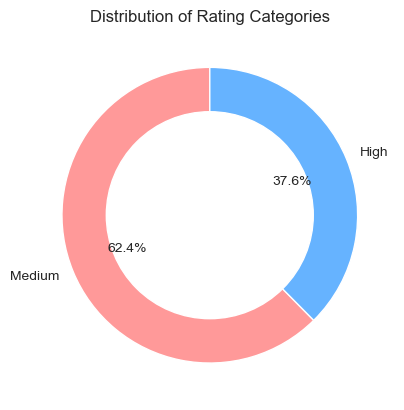

In [340]:
# Count the number of occurrences of each rating category
rating_counts = df['Rating Category'].value_counts()

# Plotting
fig, ax = plt.subplots()
ax.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66b3ff', '#99ff99'])
# Draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribution of Rating Categories')
plt.show()

#### Removing NaN values in New features

In [341]:
has_nan = df.isna().sum() 
print(has_nan)

Unnamed: 0                 0
Name                       0
Rating                     0
Spec_score                 0
No_of_sim                  0
Ram                       20
Battery                    2
Display                    2
Camera                     0
Android_version            0
Price                      0
company                    0
Inbuilt_memory             6
fast_charging             40
Screen_resolution          0
Processor                  0
Processor_name             0
Android_version_clean      0
Total_Rear_Camera_MP       0
Front_Camera_MP          124
Price Range                0
Rating Category            0
dtype: int64


In [342]:
df['Ram'].fillna(df['Ram'].mode()[0], inplace=True)
df['Battery'].fillna(df['Battery'].mode()[0], inplace=True)
df['Display'].fillna(df['Display'].mode()[0], inplace=True)
df['Inbuilt_memory'].fillna(df['Inbuilt_memory'].mode()[0], inplace=True)
df['fast_charging'].fillna(df['fast_charging'].mode()[0], inplace=True)
df['Front_Camera_MP'].fillna(df['Front_Camera_MP'].mode()[0], inplace=True)

In [343]:
has_nan = df.isna().sum() 
print(has_nan)

Unnamed: 0               0
Name                     0
Rating                   0
Spec_score               0
No_of_sim                0
Ram                      0
Battery                  0
Display                  0
Camera                   0
Android_version          0
Price                    0
company                  0
Inbuilt_memory           0
fast_charging            0
Screen_resolution        0
Processor                0
Processor_name           0
Android_version_clean    0
Total_Rear_Camera_MP     0
Front_Camera_MP          0
Price Range              0
Rating Category          0
dtype: int64


In [344]:
df.head()

,Unnamed: 0,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,Android_version,...,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name,Android_version_clean,Total_Rear_Camera_MP,Front_Camera_MP,Price Range,Rating Category
0,0,Samsung Galaxy F14 5G,4.65,68,"Dual Sim, 3G, 4G, 5G, VoLTE,",4.0,6000.0,6.6,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,13,...,128.0,25.0,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330,13.0,52,13.0,Mid-range,High
1,1,Samsung Galaxy A11,4.20,63,"Dual Sim, 3G, 4G, VoLTE,",2.0,4000.0,6.4,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...,10,...,32.0,15.0,720 x 1560 px Display with Punch Hole,1.8 GHz Processor,Octa Core,10.0,20,8.0,Mid-range,Medium
2,2,Samsung Galaxy A13,4.30,75,"Dual Sim, 3G, 4G, VoLTE,",4.0,5000.0,6.6,50 MP Quad Rear &amp; 8 MP Front Camera,12,...,64.0,25.0,1080 x 2408 px Display with Water Drop Notch,2 GHz Processor,Octa Core,12.0,50,8.0,Mid-range,Medium
3,3,Samsung Galaxy F23,4.10,73,"Dual Sim, 3G, 4G, VoLTE,",4.0,6000.0,6.4,48 MP Quad Rear &amp; 13 MP Front Camera,12,...,64.0,18.0,720 x 1600 px,Octa Core,Helio G88,12.0,48,13.0,Mid-range,Medium
4,4,Samsung Galaxy A03s (4GB RAM + 64GB),4.10,69,"Dual Sim, 3G, 4G, VoLTE,",4.0,5000.0,6.5,13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Fro...,11,...,64.0,15.0,720 x 1600 px Display with Water Drop Notch,Octa Core,Helio P35,11.0,17,5.0,Mid-range,Medium


In [345]:
df['Price']

0        34996.5
1        34965.0
2        41996.5
3        41996.5
4        41996.5
          ...   
1365     66496.5
1366     87465.0
1367     83965.0
1368     78746.5
1369    419965.0
Name: Price, Length: 1370, dtype: float64

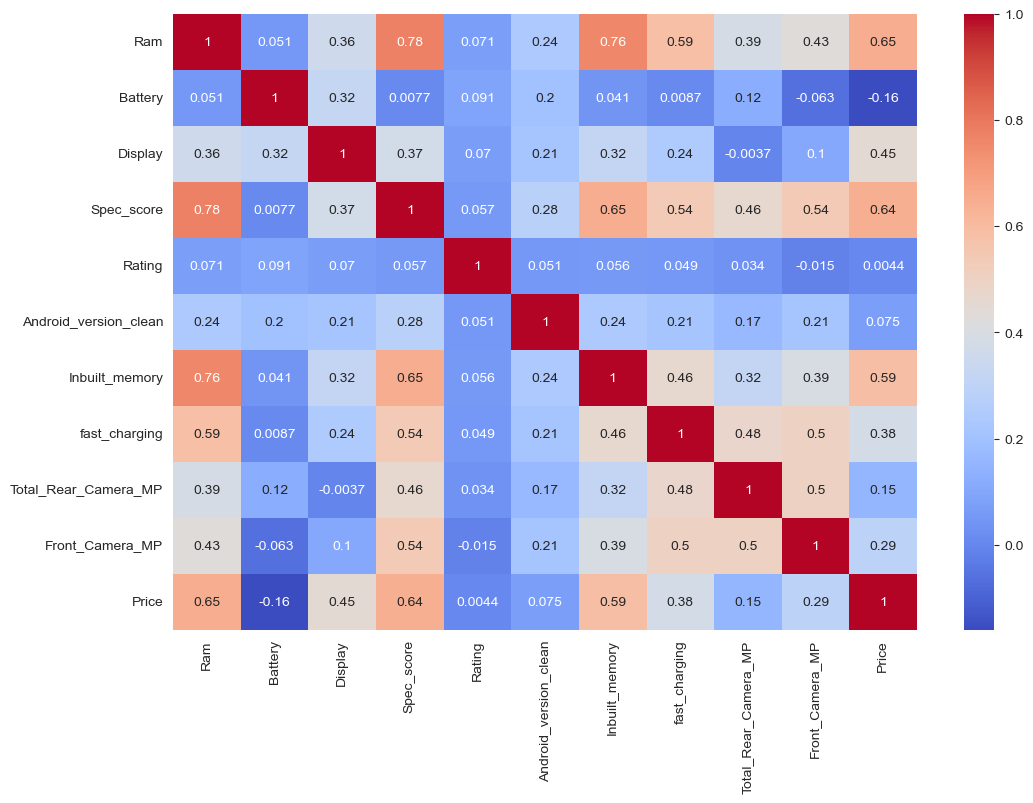

In [346]:
corr = df[['Ram', 'Battery', 'Display', 'Spec_score', 'Rating', 'Android_version_clean', 'Inbuilt_memory', 'fast_charging', 'Total_Rear_Camera_MP', 'Front_Camera_MP', 'Price']].corr()
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## Normalization
#### Min-Max Scaling: Transforms features to a specific range, typically [0, 1]


In [351]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns to normalize (excluding non-numerical columns like 'Name')
features_to_normalize = ['Ram', 'Battery', 'Display', 'Spec_score', 'Rating', 'Android_version_clean', 'Inbuilt_memory', 'fast_charging', 'Total_Rear_Camera_MP', 'Front_Camera_MP']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected features
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

df.head()

,Unnamed: 0,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,Android_version,...,fast_charging,Screen_resolution,Processor,Processor_name,Android_version_clean,Total_Rear_Camera_MP,Front_Camera_MP,Price Range,Rating Category,Price_category
0,0,Samsung Galaxy F14 5G,0.90,0.464286,"Dual Sim, 3G, 4G, 5G, VoLTE,",0.130435,0.476744,0.276316,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,13,...,0.072165,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330,0.846154,0.165605,0.189655,Mid-range,High,Medium
1,1,Samsung Galaxy A11,0.45,0.375000,"Dual Sim, 3G, 4G, VoLTE,",0.043478,0.244186,0.250000,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...,10,...,0.030928,720 x 1560 px Display with Punch Hole,1.8 GHz Processor,Octa Core,0.615385,0.063694,0.103448,Mid-range,Medium,Medium
2,2,Samsung Galaxy A13,0.55,0.589286,"Dual Sim, 3G, 4G, VoLTE,",0.130435,0.360465,0.276316,50 MP Quad Rear &amp; 8 MP Front Camera,12,...,0.072165,1080 x 2408 px Display with Water Drop Notch,2 GHz Processor,Octa Core,0.769231,0.159236,0.103448,Mid-range,Medium,Medium
3,3,Samsung Galaxy F23,0.35,0.553571,"Dual Sim, 3G, 4G, VoLTE,",0.130435,0.476744,0.250000,48 MP Quad Rear &amp; 13 MP Front Camera,12,...,0.043299,720 x 1600 px,Octa Core,Helio G88,0.769231,0.152866,0.189655,Mid-range,Medium,Medium
4,4,Samsung Galaxy A03s (4GB RAM + 64GB),0.35,0.482143,"Dual Sim, 3G, 4G, VoLTE,",0.130435,0.360465,0.263158,13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Fro...,11,...,0.030928,720 x 1600 px Display with Water Drop Notch,Octa Core,Helio P35,0.692308,0.054140,0.051724,Mid-range,Medium,Medium


## Classification Price Categories  

In [348]:
# Create bins for price categories (e.g., Low, Medium, High)
bins = [0, 25000, 75000, 500000]
labels = ['Low', 'Medium', 'High']

# Add a new column with the categorized price
df['Price_category'] = pd.cut(df['Price'], bins=bins, labels=labels)

# Display the updated DataFrame
df[['Price', 'Price_category']].head()

,Price,Price_category
0,34996.5,Medium
1,34965.0,Medium
2,41996.5,Medium
3,41996.5,Medium
4,41996.5,Medium


#### Split the Data into Features and Target 

In [364]:
from sklearn.model_selection import train_test_split

features_to_normalize1 = ['Ram', 'Battery', 'Display', 'Android_version_clean', 'Inbuilt_memory', 'fast_charging', 'Total_Rear_Camera_MP', 'Front_Camera_MP']

# Define features and target (Price_category)
X = df[features_to_normalize1]  # Features are still the normalized columns
y = df['Price_category']  # Target is now the categorized price

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1096, 2) (274, 2) (1096,) (274,)


#### Classification Model Logistic Regression 

In [373]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
#clf = LogisticRegression()

# Train the model
#clf.fit(X_train, y_train)

# Make predictions on the test set
#y_pred = clf.predict(X_test)

# Evaluate the model's performance
#accuracy = accuracy_score(y_test, y_pred)
#print(f"Accuracy: {accuracy}")
#print(classification_report(y_test, y_pred))

## Predicting smartphone prices (regression)

In [366]:
from sklearn.model_selection import train_test_split

features_to_normalize2 = ['Ram', 'Battery', 'Display', 'Android_version_clean', 'Inbuilt_memory', 'fast_charging', 'Total_Rear_Camera_MP', 'Front_Camera_MP']

# Define the features and target
X = df[features_to_normalize2]  # Normalized features
y = df['Price']  # Target variable (Price)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the shapes of the resulting splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1096, 8) (274, 8) (1096,) (274,)


#### Linear Regression 

In [367]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

#### Evaluation Metrics 

In [368]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 44689.13344019647
Mean Squared Error: 4325203702.794952
R-squared: 0.6083617550208051


## Checking the Predictions 

In [370]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Compare the first few predicted values with the actual values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Show the comparison for the first few test samples
print(comparison_df.head())


        Actual      Predicted
427   101496.5  201440.069486
1088  108496.5  106826.737056
668   255496.5  206427.006805
572    97965.0  161415.150565
115    41965.0   20020.260790


## Visualizing the Predictions 

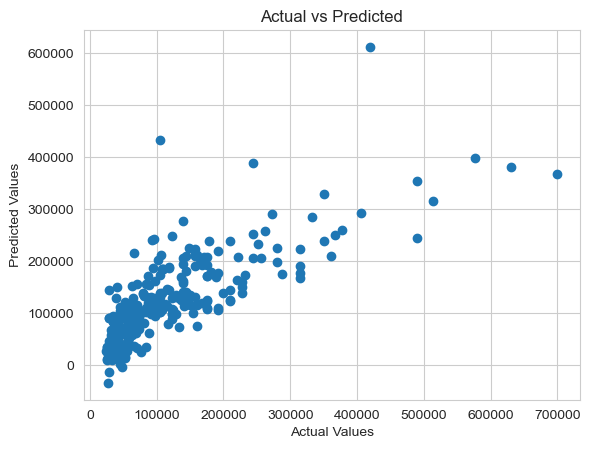

In [371]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()


## Saving the Model Using pickle

In [372]:
import pickle

# Saving the model to a file
with open('smartphone_price_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Loading the saved model later
with open('smartphone_price_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Using the loaded model to make predictions
new_predictions = loaded_model.predict(X_test)


# Predictions on new data

In [374]:
import pickle

# Load the saved model from the file
with open('smartphone_price_model.pkl', 'rb') as file:
    model = pickle.load(file)

In [383]:
# Example new data for multiple smartphones
new_smartphones = [
    [4, 5000, 6.5, 12.0, 128, 25, 48, 13],  # Smartphone 1
    [6, 4500, 6.7, 11.0, 256, 30, 64, 16],  # Smartphone 2
    [8, 4000, 6.1, 13.0, 512, 18, 108, 20]  # Smartphone 3
]
#['Ram', 'Battery', 'Display', 'Android_version_clean', 'Inbuilt_memory', 'fast_charging', 'Total_Rear_Camera_MP', 'Front_Camera_MP']

# Make predictions on the new data using the loaded model
predicted_prices = model.predict(new_smartphones)

# Print the predicted prices for the new smartphones
for i, price in enumerate(predicted_prices):
    print(f"Predicted price for Smartphone {i+1}: {price}")


Predicted price for Smartphone 1: -2284778389.81992
Predicted price for Smartphone 2: -2040380838.7566924
Predicted price for Smartphone 3: -1783443081.2721806


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [385]:
# Save the scaler after training
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Load the scaler before making predictions
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

    new_smartphones1 = [
    [4, 5000, 6.5, 12.0, 128, 25, 48, 13],  # Smartphone 1
    [6, 4500, 6.7, 11.0, 256, 30, 64, 16],  # Smartphone 2
    [8, 4000, 6.1, 13.0, 512, 18, 108, 20]  # Smartphone 3
]
    
# Scale the new data before making predictions
new_smartphones_scaled = scaler.transform(new_smartphones1)

# Make predictions on the scaled data
predicted_prices = model.predict(new_smartphones_scaled)

# Print the predicted prices
for i, price in enumerate(predicted_prices):
    print(f"Predicted price for Smartphone {i+1}: {price}")


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


ValueError: X has 8 features, but MinMaxScaler is expecting 10 features as input.